First of all, let's import the libraries which will be used.

In [1]:
import numpy as np # Linear algebra
import matplotlib.pyplot as plt # Plots
import random, cv2, os, re # Read and generate datas
from tensorflow.keras.preprocessing import image # Read datas for model
from tensorflow.keras.models import model_from_json #For read model

Now, let's define some parameters

In [2]:
path = '../dados_test/' # Path of test datas
list_path = sorted(os.listdir(path)) # Get archives sorted
number_classes = len(list_path) # Get number of classes

print("Amount of data: "+str(number_classes))
print("Classes of data: "+str(list_path))

Amount of data: 29
Classes of data: ['A_test.jpg', 'B_test.jpg', 'C_test.jpg', 'D_test.jpg', 'E_test.jpg', 'F_test.jpg', 'G_test.jpg', 'H_test.jpg', 'I_test.jpg', 'J_test.jpg', 'K_test.jpg', 'L_test.jpg', 'M_test.jpg', 'N_test.jpg', 'O_test.jpg', 'P_test.jpg', 'Q_test.jpg', 'R_test.jpg', 'S_test.jpg', 'T_test.jpg', 'U_test.jpg', 'V_test.jpg', 'W_test.jpg', 'X_test.jpg', 'Y_test.jpg', 'Z_test.jpg', 'del_test.jpg', 'nothing_test.jpg', 'space_test.jpg']


Below it's the function that return the letter which was recognized

In [3]:
def alpha(argument):
    switcher = {
        0: "A",
        1: "B",
        2: "C",
        3: "D",
        4: "E",
        5: "F",
        6: "G",
        7: "H",
        8: "I",
        9: "J",
        10: "K",
        11: "L",
        12: "M",
        13: "N",
        14: "O",
        15: "P",
        16: "Q",
        17: "R",
        18: "S",
        19: "T",
        20: "U",
        21: "V",
        22: "W",
        23: "X",
        24: "Y",
        25: "Z",
        26: "del",
        27: "nothing",
        28: "space",
    }
    return switcher.get(argument, "Invalid value")

Get the model

In [4]:
arquivo = open('model_json.json', 'r') # Open the json model
struct = arquivo.read() # Read the model
arquivo.close() # Close the model

model = model_from_json(struct) # Read the json archive
model.load_weights('model_h5.h5') # Pass the weights to the model

The prediction function

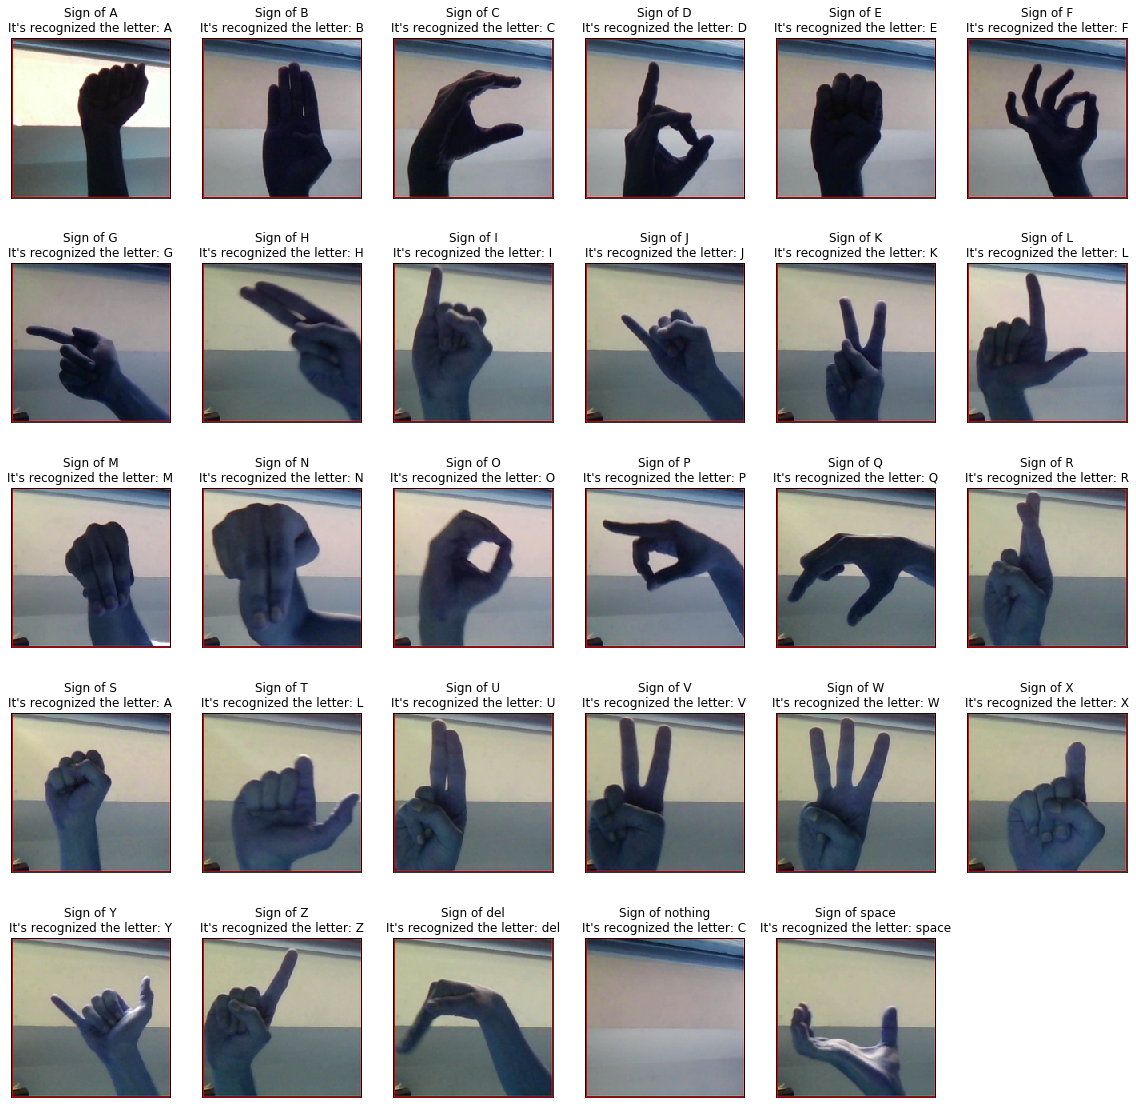

In [5]:
def prediction():
    plt.figure(figsize = (20, 20)) # Define the figure
    
    for i in range(1, 30):
        result = [] # Vector of results
        imgs = path + list_path[i-1] # Get a image
        
        test_image = image.load_img(imgs, target_size=(64, 64)) # Load image to predict
        test_image = image.img_to_array(test_image) # Convert image to array
        test_image = np.expand_dims(test_image, axis=0) #Expand the dimension of image

        pred = model.predict_on_batch(test_image) # Make prediction
        result.append(pred) # Get values

        result = np.asarray(result) # Define the vector of result as array
        imprime = np.array(result[0][0]) # Call the function of letter

        letter_result = alpha(imprime.argmax()) # Get the letter result
        
        letter = list_path[i-1].split("_")[0] # Get the letter of image
        
        plt.subplot(5, 6, i) # Define subplots
        # Plot
        plt.imshow(cv2.imread(imgs))
        plt.title("Sign of "+str(letter)+"\nIt's recognized the letter: "+str(letter_result))
        plt.xticks([])
        plt.yticks([])
prediction()